<a href="https://colab.research.google.com/github/Gautameshwar/Machine-Learning/blob/main/SGD_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.5566731459821956 1.259391531463226
2.5624927980862195 1.6371668541335938
2.420780902494743 1.0911860576595331
2.4349961466568226 5.273454456838003


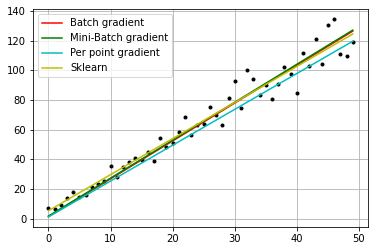

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
reg=linear_model.LinearRegression()

#linear line
m=2
c=3

#our random data
x=np.arange(50)
y=np.array([(m+np.random.uniform())*i + c+ np.random.uniform(0,5) for i in x])

#to find the gradient descent of a linear data...

#loss fn takes x,y arrays, returns their mean squared loss
def lossfn(x,y,m,c):
    s=0
    for i in range(x.size):
        s+=(y[i]-(m*x[i]+c))**2
    s/=x.size
    
    return s

#defining the gradient fn
def grad(x,y,m,c):
    #weight of our change along negative gradient 
    h=0.0001
    s=0
    sx=0
    
    for i in range(x.size):
        s+=m*x[i]+c-y[i]
        sx+=x[i]*(m*x[i]+c-y[i])
    
    gm=2/x.size*sx
    gc=2/x.size*s
    
    return m-h*gm, c-h*gc

#sgd batch method
def batch(x,y,a,b):
    #run for a large no of iterations.. (how large is large enuf??)
    for i in range(1000):
        a,b=grad(x,y,a,b)
    return a,b

#our guessed slpoe n intercept using batch sgd..
a1,b1=batch(x, y, 1, 1)
print(a1,b1)

#sgd mini batch method
def minibatch(x,y,a,b):
    x1,y1=np.array(x[::3]),np.array(y[::3])
    x2,y2=np.array(x[1::3]),np.array(y[1::3])
    x3,y3=np.array(x[2::3]),np.array(y[2::3])
    
    a,b=batch(x1,y1,a,b)
    a,b=batch(x2,y2,a,b)
    a,b=batch(x3,y3,a,b)
    
    return a,b

a2,b2=minibatch(x,y,1,1)
print(a2,b2)

#sgd per point
def sgdpoint(x,y,a,b):
    #imput an array of single ith element of x,y and find the gradient...
    for i in range(x.size):
        a,b=grad(np.array([x[i]]),np.array([y[i]]),a,b)
        
        #this gives more error than simple grad...!
        # a,b=batch(np.array([x[i]]),np.array([y[i]]),a,b)
        
    return a,b

a3,b3=sgdpoint(x,y,1,1)
print(a3,b3)

reg.fit(x.reshape(-1,1), y)
a4,b4=reg.coef_[0],reg.intercept_
print(a4,b4)

#plotting our random data
plt.figure()
plt.grid()
plt.plot(x,y,'k .')
plt.plot(x,a1*x+b1,'r',label='Batch gradient')
plt.plot(x,a2*x+b2,'g',label='Mini-Batch gradient')
plt.plot(x,a3*x+b3,'c',label='Per point gradient')
plt.plot(x,a4*x+b4,'y',label='Sklearn')
plt.legend()
plt.show()